In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.style.use('fivethirtyeight')

## Collecting the data:

In [69]:
rating_conv = json.load(open('../data_coll/rating_conv.json'))
rev_rating_conv = json.load(open('../data_coll/rev_rating_conv.json'))
routes = pd.read_csv('../data/routes.csv')
users = pd.read_csv('../data/user_ticks.csv', delimiter='|')
climbs = users.merge(routes, how='left', left_on='route_id', right_on='route_id')

## Exploration of the `routes` dataframe:

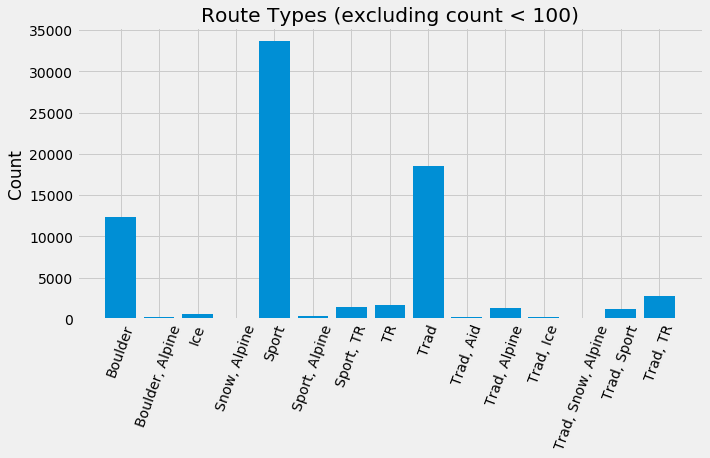

In [189]:
route_types = routes.groupby('type').count()['route_id']
route_types = route_types[route_types > 100]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(route_types.index,route_types.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Types (excluding count < 100)');

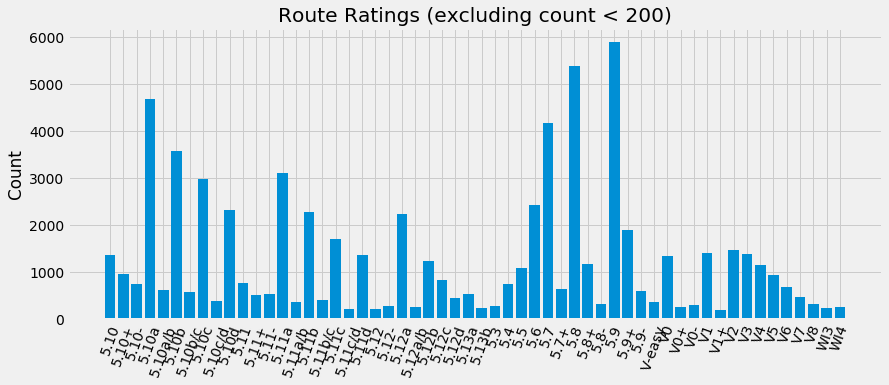

In [311]:
route_ratings = routes.groupby('base_rating').count()['route_id']
route_ratings = route_ratings[route_ratings > 200]

fig, ax = plt.subplots(figsize=(13,5))
ax.bar(route_ratings.index,route_ratings.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Ratings (excluding count < 200)');

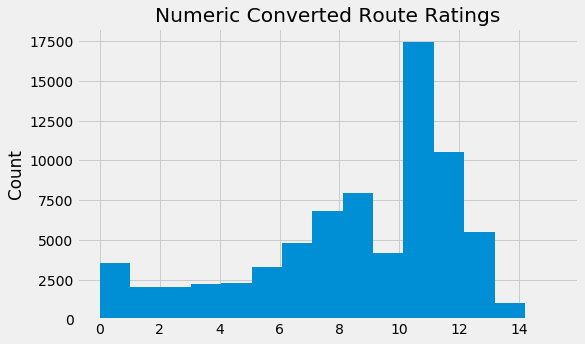

In [233]:
routes_no_nan = routes[
    (routes['base_rating'].str.startswith('5', na=False))
    | (routes['base_rating'].str.startswith('V', na=False))]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(routes_no_nan['num_rating'], bins=15);
ax.set_ylabel('Count');
ax.set_title('Numeric Converted Route Ratings');

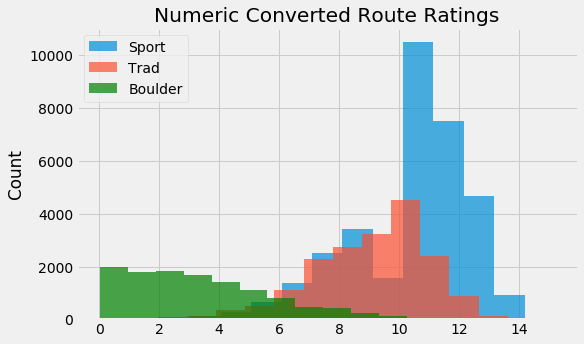

In [281]:
sport_ratings = routes_no_nan[routes_no_nan['type'] == 'Sport']['num_rating']
trad_ratings = routes_no_nan[routes_no_nan['type'] == 'Trad']['num_rating']
boulder_ratings = routes_no_nan[routes_no_nan['type'] == 'Boulder']['num_rating']

bins = 15
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sport_ratings, bins=bins, alpha=alpha);
ax.hist(trad_ratings, bins=bins, alpha=alpha);
ax.hist(boulder_ratings, bins=bins, alpha=alpha, color='g');
ax.set_ylabel('Count');
ax.set_title('Numeric Converted Route Ratings');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

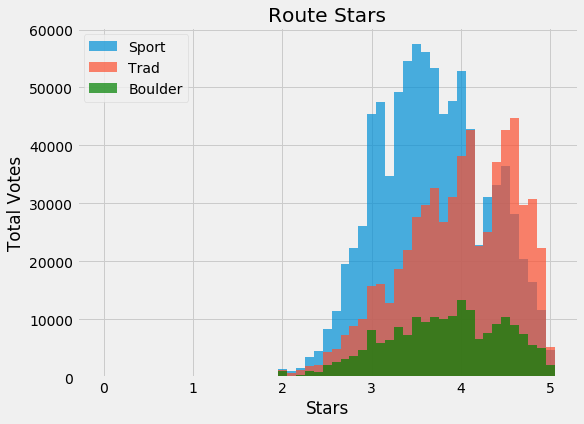

In [280]:
trad_stars = routes[routes['type'] == 'Trad'].groupby('stars').sum()['star_votes']
sport_stars = routes[routes['type'] == 'Sport'].groupby('stars').sum()['star_votes']
boulder_stars = routes[routes['type'] == 'Boulder'].groupby('stars').sum()['star_votes']

width = .1
alpha = .7
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(sport_stars.index, sport_stars.values, width=width, alpha=alpha);
ax.bar(trad_stars.index, trad_stars.values, width=width, alpha=alpha);
ax.bar(boulder_stars.index, boulder_stars.values, width=width, alpha=alpha, color='g');
ax.set_ylabel('Total Votes');
ax.set_xlabel('Stars')
ax.set_title('Route Stars');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

## Exploration of the `routes` dataframe:

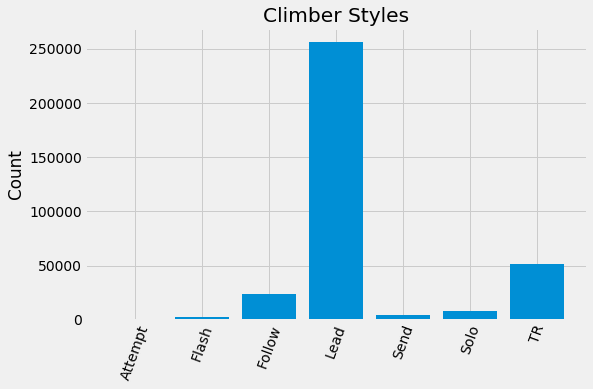

In [234]:
user_styles = users.groupby('style').count()['user_id']

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(user_styles.index,user_styles.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Climber Styles');

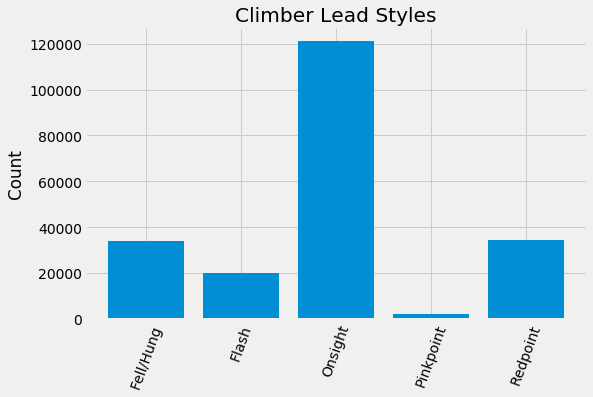

In [235]:
user_lead_styles = users.groupby('lead_style').count()['user_id']

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(user_lead_styles.index,user_lead_styles.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Climber Lead Styles');

## Exploration of combined `climbs` data:

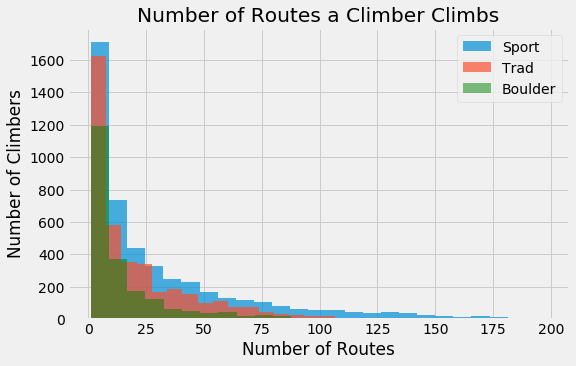

In [279]:
sport_counts = climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Sport')].groupby('user_id').count()['route_id']
trad_counts = climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Trad')].groupby('user_id').count()['route_id']
boulder_counts = climbs[(climbs['type'] == 'Boulder')].groupby('user_id').count()['route_id']

bins = 25
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sport_counts, bins=bins, alpha=alpha);
ax.hist(trad_counts, bins=bins, alpha=alpha);
ax.hist(boulder_counts, bins=bins, alpha=.5, color='g');
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('Number of Routes');
ax.set_title('Number of Routes a Climber Climbs');
ax.legend(['Sport','Trad','Boulder'],loc='upper right');

In [303]:
sport_max = (climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Sport')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'sport_max'}))
trad_max = (climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Trad')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'trad_max'}))
boulder_max = (climbs[(climbs['type'] == 'Boulder')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'boulder_max'}))
sport_avg = (climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Sport')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'sport_avg'}))
trad_avg = (climbs[(climbs['style'] == 'Lead') & (climbs['type'] == 'Trad')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'trad_avg'}))
boulder_avg = (climbs[(climbs['type'] == 'Boulder')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'boulder_avg'}))

climber_stats = sport_max.merge(trad_max, how='outer', left_on='user_id', right_on='user_id')
climber_stats = climber_stats.merge(boulder_max, how='outer', left_on='user_id', right_on='user_id')
climber_stats = climber_stats.merge(sport_avg, how='outer', left_on='user_id', right_on='user_id')
climber_stats = climber_stats.merge(trad_avg, how='outer', left_on='user_id', right_on='user_id')
climber_stats = climber_stats.merge(boulder_avg, how='outer', left_on='user_id', right_on='user_id')

climber_stats['max_sport_trad_diff'] = climber_stats['sport_max'] - climber_stats['trad_max']
climber_stats['avg_sport_trad_diff'] = climber_stats['sport_avg'] - climber_stats['trad_avg']
climber_stats.head()

,sport_max,trad_max,boulder_max,sport_avg,trad_avg,boulder_avg,max_sport_trad_diff,avg_sport_trad_diff
user_id,,,,,,,,
10134,9.3,7.0,NaN,7.185714,6.333333,NaN,2.3,0.852381
10143,12.4,NaN,4.01,9.950000,NaN,4.01,NaN,NaN
10231,13.2,9.3,NaN,11.100000,9.300000,NaN,3.9,1.800000
10270,12.3,11.4,0.01,9.844554,8.080556,0.01,0.9,1.763999
10332,10.7,6.0,NaN,9.650000,6.000000,NaN,4.7,3.650000


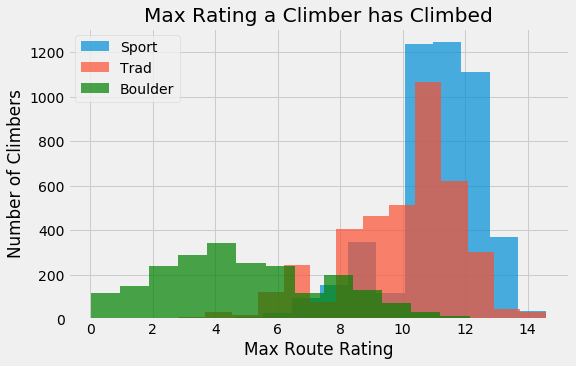

In [298]:
bins = 15
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(climber_stats['sport_max'], bins=bins, alpha=alpha);
ax.hist(climber_stats['trad_max'], bins=bins, alpha=alpha);
ax.hist(climber_stats['boulder_max'], bins=bins, alpha=alpha, color='g');
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('Max Route Rating');
ax.set_title('Max Rating a Climber has Climbed');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

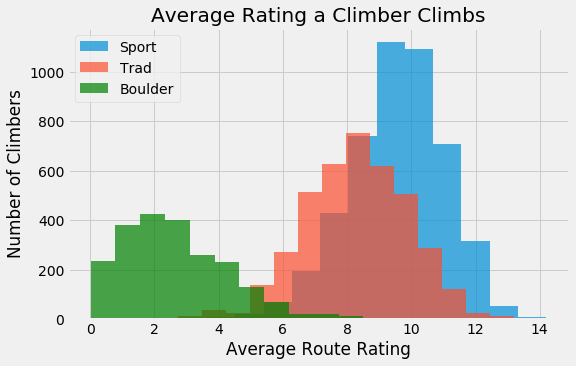

In [305]:
bins = 15
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(climber_stats['sport_avg'], bins=bins, alpha=alpha);
ax.hist(climber_stats['trad_avg'], bins=bins, alpha=alpha);
ax.hist(climber_stats['boulder_avg'], bins=bins, alpha=alpha, color='g');
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('Average Route Rating');
ax.set_title('Average Rating a Climber Climbs');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

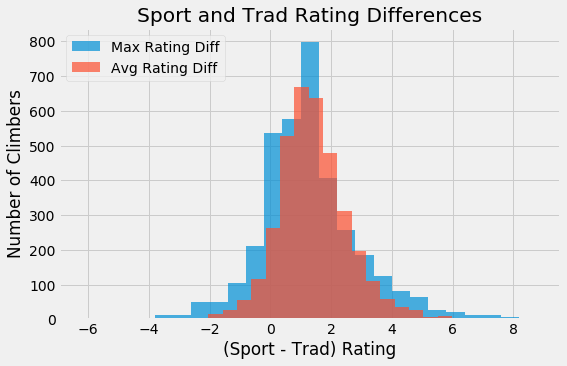

In [309]:
bins = 25
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(climber_stats['max_sport_trad_diff'], bins=bins, alpha=alpha);
ax.hist(climber_stats['avg_sport_trad_diff'], bins=bins, alpha=alpha);
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('(Sport - Trad) Rating');
ax.set_title('Sport and Trad Rating Differences');
ax.legend(['Max Rating Diff','Avg Rating Diff'],loc='upper left');

In [287]:
users.head(3)

,route_id,date,pitches,notes,style,lead_style,tick_id,user_stars,user_rating,user_id
0,106002151,2019-11-02,1.0,NaN,TR,NaN,118003759,NaN,NaN,200527767
1,106241707,2019-11-02,1.0,NaN,TR,NaN,118003758,NaN,NaN,200527767
2,106589615,2019-11-02,1.0,NaN,Lead,NaN,118003757,NaN,NaN,200527767


In [286]:
routes.head(3)

,route_id,name,type,rating,stars,star_votes,pitches,location,longitude,latitude,base_rating,num_rating
0,105806397,The Grand Wall,"Trad, Aid",5.11a A0,4.9,324,9.0,"['International', 'North America', 'Canada', '...",-123.1480,49.6822,5.11a,11.2
1,105806955,Exasperator,Trad,5.10c,5.0,450,2.0,"['International', 'North America', 'Canada', '...",-123.1481,49.6823,5.10c,10.6
2,105947052,Klahanie Crack,Trad,5.7,4.7,465,1.0,"['International', 'North America', 'Canada', '...",-123.1578,49.6696,5.7,7.0
